### Problem: $$\frac{dy}{dx} = x^2 + y , \qquad y(0) = 2$$


#### Analytical solution:

Rewrite the problem as

\begin{eqnarray*}
\frac{dy}{dx} - y & = & x^2 \\
\frac{d}{dx}\left[e^{-x} y\right] & = & e^{-x} x^2 \\
&& \\
\int\frac{d}{dx}\left[e^{-x} y\right] & = & \int e^{-x} x^2 \\
e^{-x} y & = & -e^{-x}(2x^2 + 2x + 2) + C ,\quad \text{after two integration by parts} \\
y & = & -2x^2 - 2x - 2 + 4e^{x} , \quad \text{upon enforcing boundary value } y(0) = 2
\end{eqnarray*}

so

$$\boxed{y_{exact} = 4e^{x} - 2(x^2 - x - 1)}$$

### NumPy stepthrough

In [1]:
import numpy as np

class state:
    def __init__(self, a, b, N):
        self.a = a
        self.b = b
        self.L = float(b-a)
        self.N = N
        self.width = self.L / self.N
        self.values = np.linspace(self.a, self.b, self.N)
        self.max_idx = self.N-1

def f(x,y):
    return x ** 2 + y

def Euler(f,x,y,i):
    y[i+1] = y[i] + f(x.values[i], y.values[i]) * x.width

numerical estimate for y(5.99198) = 1451.65
exact value at y(5.99198) = 1550.94


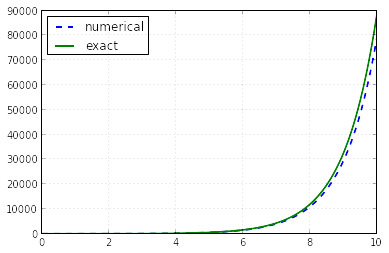

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# setup grids and initial condition
x = state(a = 0, b = 10, N = 500) 
y = np.zeros_like(x.values)
y[0] = 2

for i in range(1,x.N):
    y[i] = y[i-1] + f(x.values[i-1], y[i-1]) * x.width

y_exact = 4 * np.exp(x.values) - x.values ** 2 - 2*x.values - 2

## index where x is closest to 6 on numerical grid
x_is_6 = np.abs(x.values - 6).argmin()

## print out estimates
print "numerical estimate for y(%g) = %g" % (x.values[x_is_6],
                                             y[x_is_6])

print "exact value at y(%g) = %g" % (x.values[x_is_6],
                                     y_exact[x_is_6])

plt.plot(x.values,y, linewidth = 2, linestyle = '--', label = "numerical")
plt.plot(x.values, y_exact, linewidth = 2, label = "exact")
plt.grid('on')
plt.legend(loc = 'best')